In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [2]:
df=pd.read_csv("housing.csv") 
house_df=df.copy()

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [5]:
house_df.shape

(4600, 18)

In [6]:
house_df.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

CLEANING THE DATA

HANDLING MISSING VALUES

In [7]:
house_df.drop_duplicates
house_df.shape

(4600, 18)

In [8]:
house_df["sqft_living"] = house_df["sqft_living"].fillna(house_df["sqft_living"].median())
house_df["sqft_lot"] = house_df["sqft_lot"].fillna(house_df["sqft_lot"].median())
house_df["yr_built"]=house_df["yr_built"].fillna(house_df["yr_built"].median())

In [9]:
house_df['city'] = house_df['city'].fillna(house_df['city'].mode(0)[0])

In [10]:
house_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

FINDING AND RECTIFING OUTLIERS

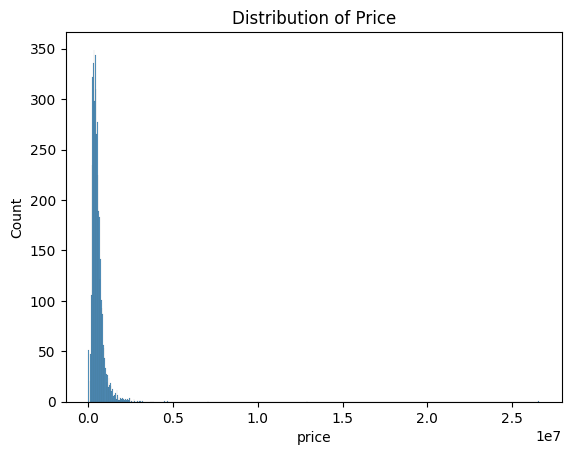

In [11]:
sns.histplot(house_df['price'])
plt.title("Distribution of Price")
plt.show()

In [12]:
# Calculate Q1, Q3, and IQR
Q1 = house_df['price'].quantile(0.25)
Q3 = house_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounhouse_df
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate median
median_price = house_df['price'].median()

# Replace outliers with median
house_df['price'] = house_df['price'].apply(lambda x: median_price if x < lower_bound or x > upper_bound else x)

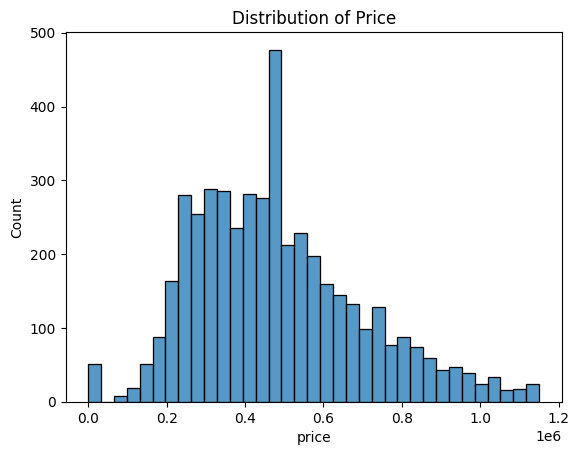

In [13]:
sns.histplot(house_df['price'])
plt.title("Distribution of Price")
plt.show()

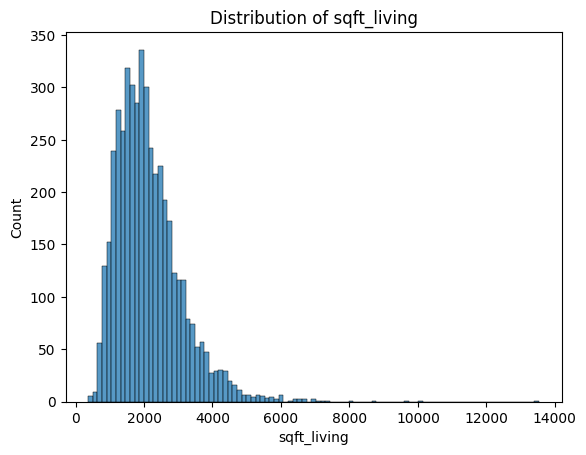

In [14]:
sns.histplot(house_df['sqft_living'])
plt.title("Distribution of sqft_living")
plt.show()

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = house_df['sqft_living'].quantile(0.25)
Q3 = house_df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

# Define bounhouse_df
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate median
median_sqft_living = house_df['sqft_living'].median()

# Replace outliers with median
house_df['sqft_living'] = house_df['sqft_living'].apply(lambda x: median_sqft_living if x < lower_bound or x > upper_bound else x)

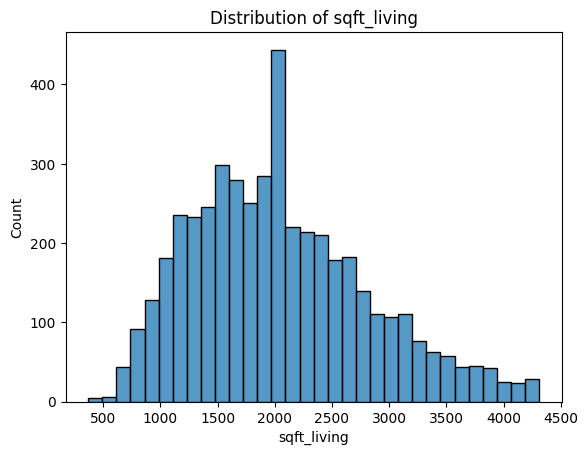

In [16]:
sns.histplot(house_df['sqft_living'])
plt.title("Distribution of sqft_living")
plt.show()

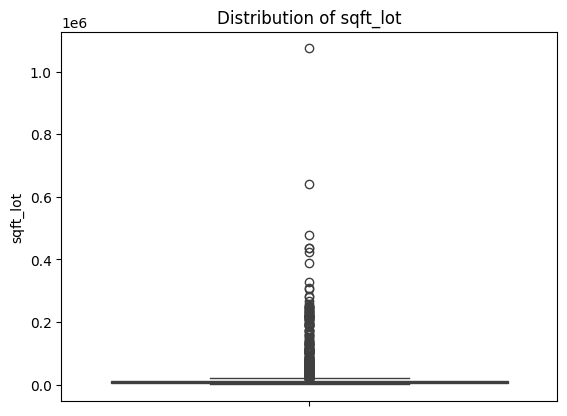

In [17]:
sns.boxplot(house_df['sqft_lot'])
plt.title("Distribution of sqft_lot")
plt.show()

In [18]:
# Calculate Q1, Q3, and IQR
Q1 = house_df['sqft_lot'].quantile(0.25)
Q3 = house_df['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1

# Define bounhouse_df
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate median
median_sqft_lot = house_df['sqft_lot'].median()

# Replace outliers with median
house_df['sqft_lot'] = house_df['sqft_lot'].apply(lambda x: median_sqft_lot if x < lower_bound or x > upper_bound else x)

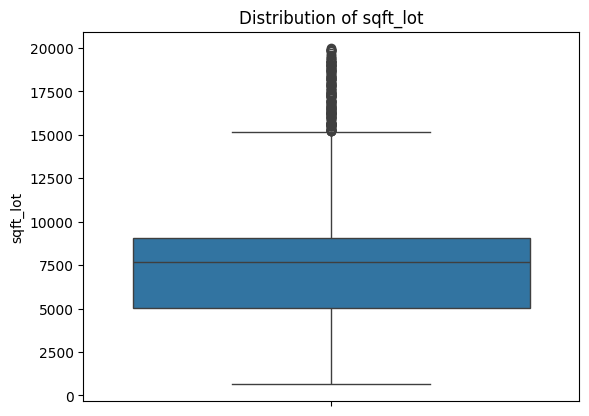

In [19]:
sns.boxplot(house_df['sqft_lot'])
plt.title("Distribution of sqft_lot")
plt.show()

In [20]:
house_df['date'] = house_df['date'].astype(str).str.strip()
house_df['date'] = pd.to_datetime(house_df['date'], format='%d/%m/%Y %H:%M', errors='coerce')
house_df['date'] = house_df['date'].dt.date

In [21]:
house_df['city'] = house_df['city'].str.upper().str.strip()
house_df['street'] = house_df['street'].str.upper().str.strip()
house_df['statezip'] = house_df['statezip'].str.upper().str.strip()
house_df['country'] = house_df['country'].str.upper().str.strip()
house_df['yr_built'] = house_df['yr_built'].round(0).astype(int)
house_df['floors'] = house_df['floors'].astype(int)
house_df['bathrooms'] = house_df['bathrooms'].astype(int)

In [22]:
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340.0,7683.5,1,0,0,3,1340,0,1955,2005,18810 DENSMORE AVE N,SHORELINE,WA 98133,USA
1,2014-05-02,461000.0,5,2,3650.0,7683.5,2,0,4,5,3370,280,1921,0,709 W BLAINE ST,SEATTLE,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930.0,7683.5,1,0,0,4,1930,0,1966,0,26206-26214 143RD AVE SE,KENT,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000.0,7683.5,1,0,0,4,1000,1000,1963,0,857 170TH PL NE,BELLEVUE,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940.0,7683.5,1,0,0,4,1140,800,1976,1992,9105 170TH AVE NE,REDMOND,WA 98052,USA


EDA

Univariate Analysis

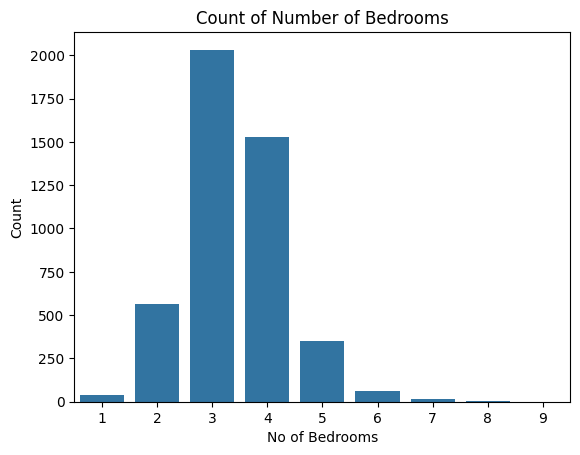

In [47]:
house_df = house_df[house_df['bedrooms'] >= 1]
sns.countplot(x='bedrooms', data=house_df)
plt.title('Count of Number of Bedrooms')
plt.xlabel('No of Bedrooms')
plt.ylabel('Count')
plt.show()

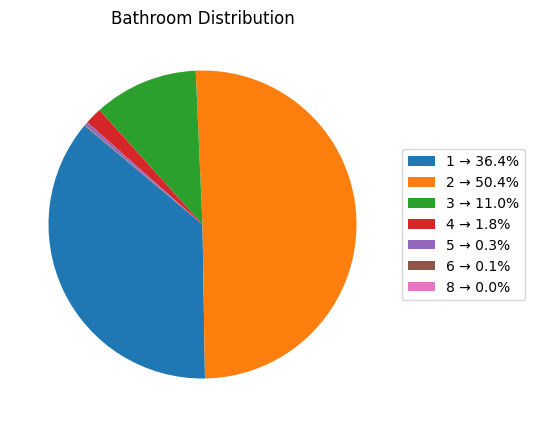

In [62]:
house_df = house_df[house_df['bathrooms'] >= 1]
bathroom_counts = house_df['bathrooms'].value_counts().sort_index()

plt.figure(figsize=(5, 5))
plt.pie(bathroom_counts, startangle=140)
plt.title("Bathroom Distribution")

labels = [f"{i} → {p:.1f}%" for i, p in zip(bathroom_counts.index, 100 * bathroom_counts / bathroom_counts.sum())]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


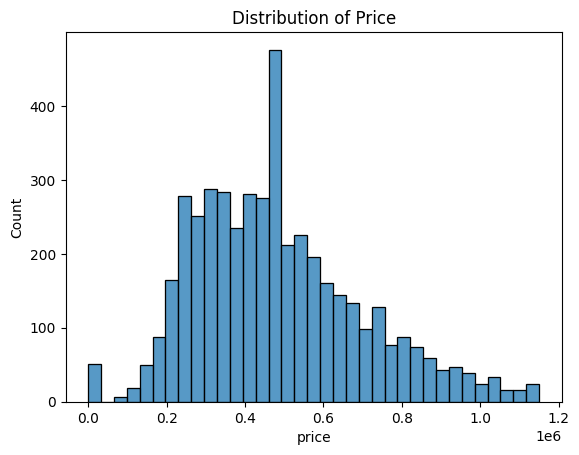

In [64]:
sns.histplot(house_df['price'])
plt.title("Distribution of Price")
plt.show()

Bivariate Analysis

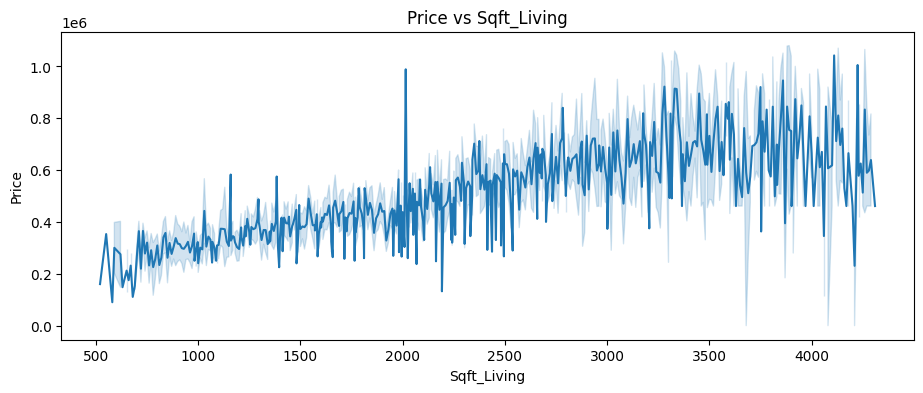

In [65]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='sqft_living', y='price', data=house_df)
plt.title('Price vs Sqft_Living')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.show()

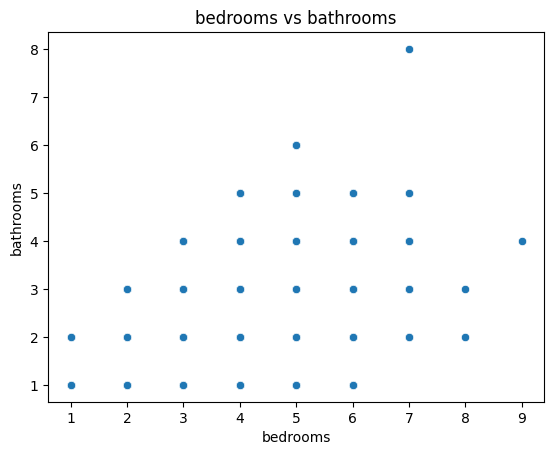

In [66]:
sns.scatterplot(x='bedrooms', y='bathrooms', data=house_df)
plt.title('bedrooms vs bathrooms')
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

Multivariate Analysis

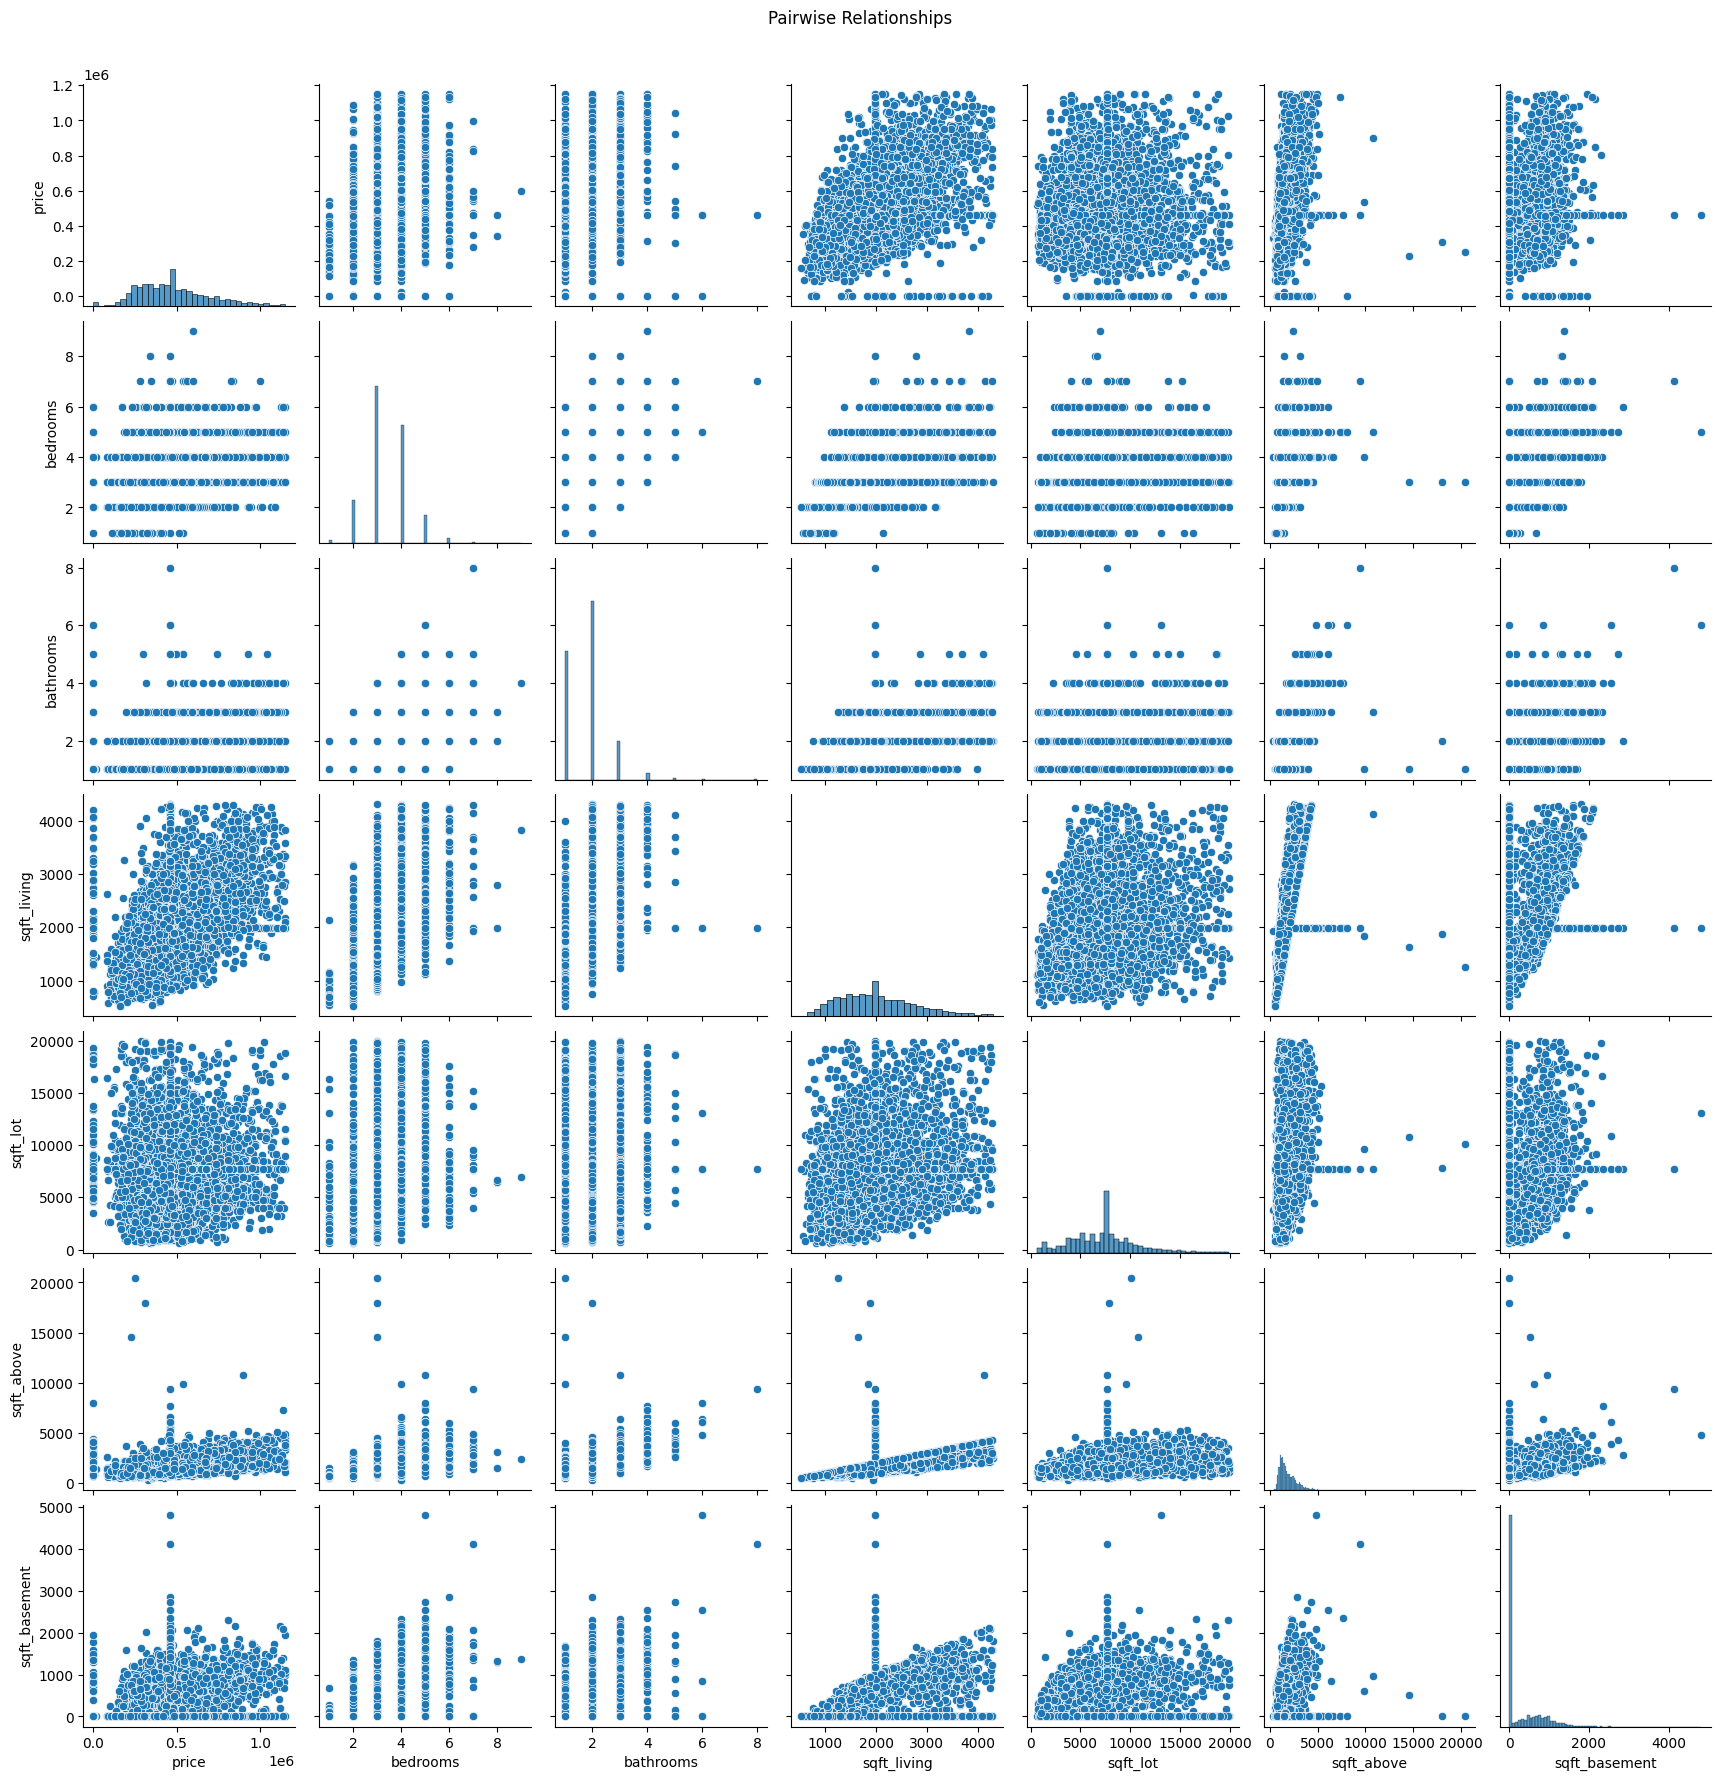

In [67]:
sns.pairplot(house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','sqft_above','sqft_basement']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

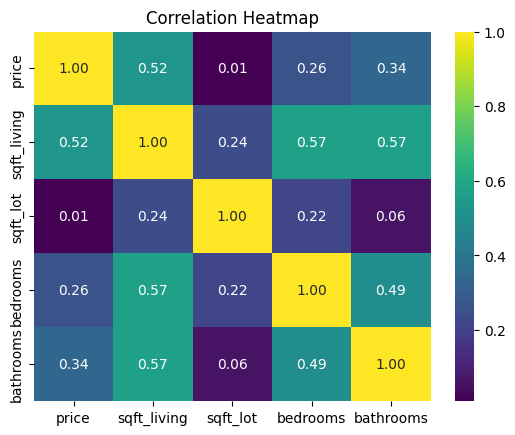

In [68]:
corr = house_df[['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis") 
plt.title("Correlation Heatmap")
plt.show()


VISUALIZATION

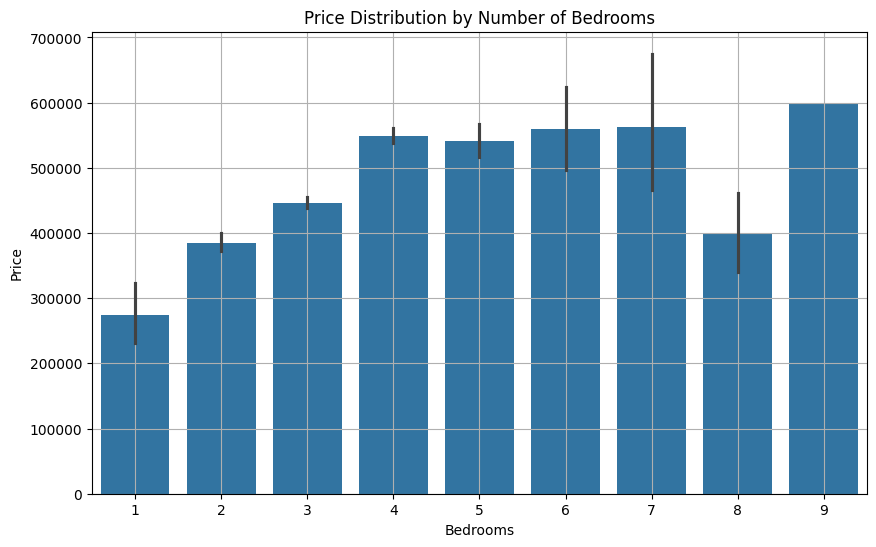

In [70]:

plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=house_df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()


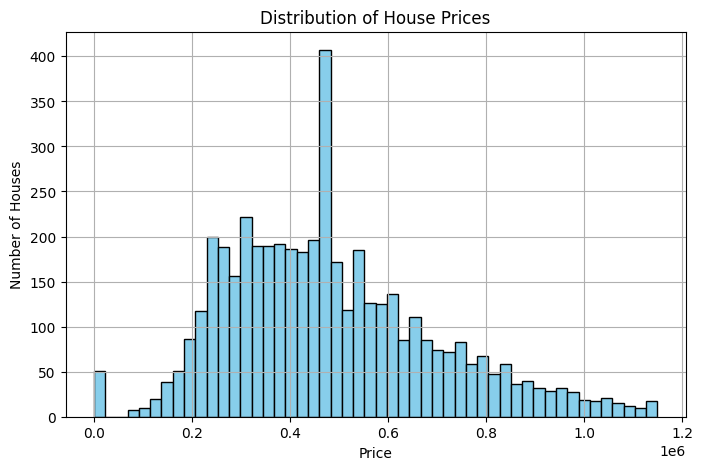

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(house_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

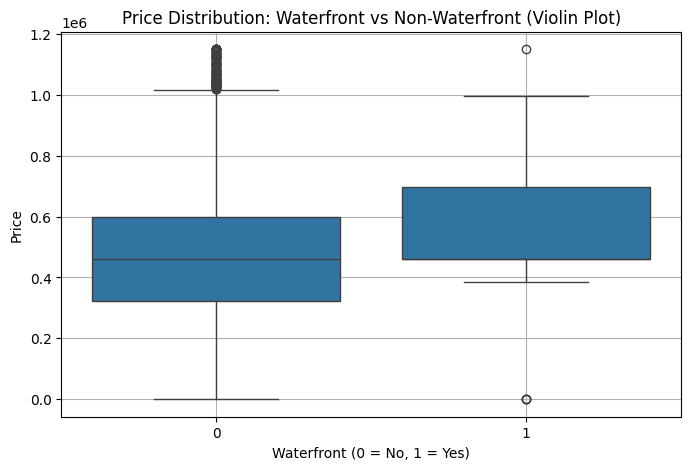

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='waterfront', y='price', data=house_df)
plt.title('Price Distribution: Waterfront vs Non-Waterfront (Violin Plot)')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


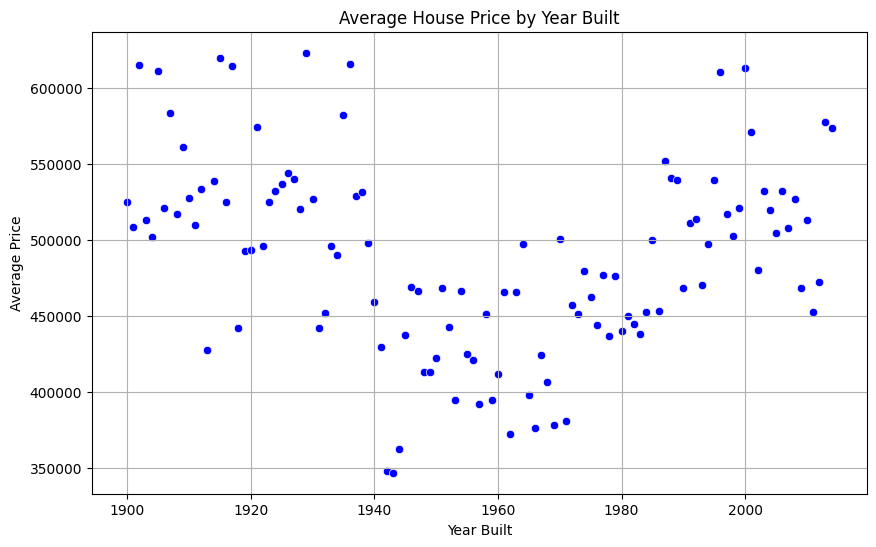

In [74]:
avg_price_by_year = house_df.groupby('yr_built')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.scatterplot(x='yr_built', y='price', data=avg_price_by_year, color='blue')


plt.title('Average House Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


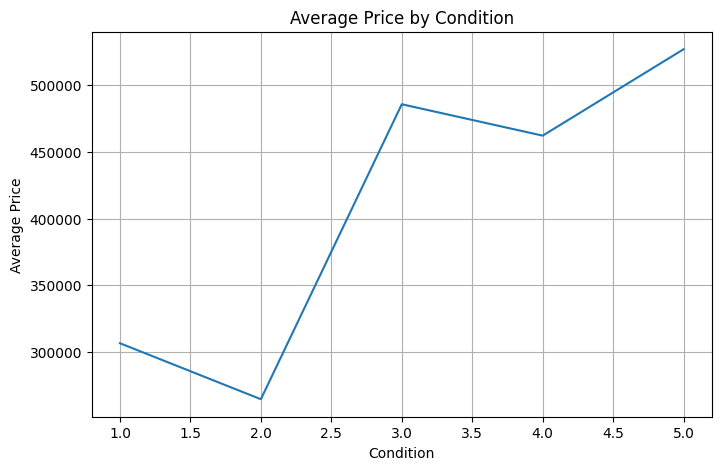

In [75]:
condition_price = house_df.groupby('condition')['price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='condition', y='price', data=condition_price)
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

FEATURE ENGINEERING

In [35]:
import datetime
current_year = datetime.datetime.now().year
house_df['property_age'] = current_year - house_df['yr_built']

In [36]:
house_df['total_sqft'] = house_df['sqft_living'] + house_df['sqft_basement']
house_df['price_per_sqft'] = house_df['price'] / house_df['total_sqft']

In [37]:
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,property_age,total_sqft,price_per_sqft
0,2014-05-02,313000.0,3,1,1340.0,7683.5,1,0,0,3,...,0,1955,2005,18810 DENSMORE AVE N,SHORELINE,WA 98133,USA,70,1340.0,233.582090
1,2014-05-02,461000.0,5,2,3650.0,7683.5,2,0,4,5,...,280,1921,0,709 W BLAINE ST,SEATTLE,WA 98119,USA,104,3930.0,117.302799
2,2014-05-02,342000.0,3,2,1930.0,7683.5,1,0,0,4,...,0,1966,0,26206-26214 143RD AVE SE,KENT,WA 98042,USA,59,1930.0,177.202073
3,2014-05-02,420000.0,3,2,2000.0,7683.5,1,0,0,4,...,1000,1963,0,857 170TH PL NE,BELLEVUE,WA 98008,USA,62,3000.0,140.000000
4,2014-05-02,550000.0,4,2,1940.0,7683.5,1,0,0,4,...,800,1976,1992,9105 170TH AVE NE,REDMOND,WA 98052,USA,49,2740.0,200.729927


TEST STATISTICS

In [38]:
from scipy.stats import ttest_ind

# Group prices
waterfront = house_df[house_df['waterfront'] == 1]['price']
non_waterfront = house_df[house_df['waterfront'] == 0]['price']

t_stat, p_val = ttest_ind(waterfront, non_waterfront, equal_var=False)

# Print results
print("T-Test: Price Comparison – Waterfront vs. Non-Waterfront")
print(f"T-statistic : {t_stat:.2f}")
print(f"P-value     : {p_val:.4e}")

# Hypothesis decision
if p_val < 0.05:
    print("Result      : Reject the null hypothesis (significant difference in price).")
else:
    print("Result      : Fail to reject the null hypothesis (no significant difference in price).")


T-Test: Price Comparison – Waterfront vs. Non-Waterfront
T-statistic : 1.57
P-value     : 1.2714e-01
Result      : Fail to reject the null hypothesis (no significant difference in price).
